* [apt_201910.csv](https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/apt_201910.csv) 파일을 읽어서 데이터프레임 생성
    * encoding 파라미터 설정
    * 가격 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000) 
        * '가격' 컬럼은 숫자 타입이어야 함 
* 데이터프레임 파악
    * info, head, tail, describe, dtypes...
* '시군구' 컬럼의 값을 사용해서 'province' 파생 변수(도, 광역시 이름) 만듦
    * '강원도 강릉시 견소동' -> '강원도'
* '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦
    * 201910 -> 2019, 10 
* 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값 
* 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값 
* 면적이 84$m^2$ 이상 100$m^2$ 미만의 서울특별시 아파트들 중에서 동별 아파트 가격 개수, 평균, 최솟값, 최댓값 
* 면적이 84$m^2$ 이상 100$m^2$ 미만의 아파트들 중에서 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값 
    * 결과를 평균의 내림차순으로 정렬해서 출력
    * 결과를 최댓값의 내림차순으로 정렬해서 출력
    * 결과를 최솟값의 오름차순으로 정렬해서 출력 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/apt_201910.csv'

In [5]:
apt = pd.read_csv(file_path, encoding='cp949', thousands=',')
#> encoding: 파일의 인코딩 타입(utf-8, cp949: 한글 windows, cp1252: 영문 windows) 
#> thousands: 숫자의 천자리 구분자로 사용되는 문자 

In [6]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [7]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [8]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [9]:
apt.describe()

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


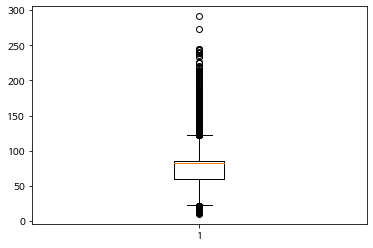

In [10]:
plt.boxplot(x=apt['면적'])
plt.show()

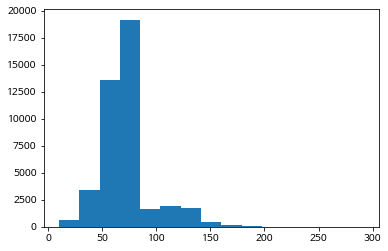

In [11]:
plt.hist(x=apt['면적'], bins=15)
plt.show()

In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

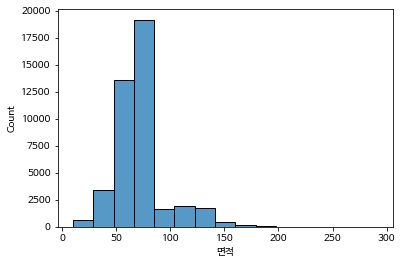

In [14]:
sns.histplot(data=apt, x='면적', bins=15)
# plt.xlabel('area')
plt.show()

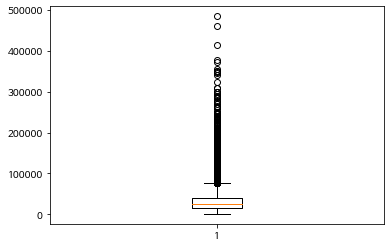

In [15]:
plt.boxplot(x=apt['가격'])
plt.show()

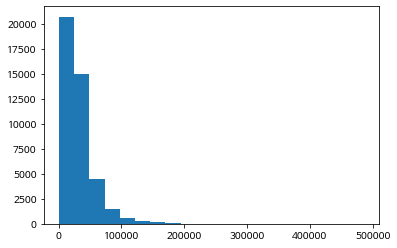

In [34]:
plt.hist(x=apt['가격'],  bins=20)
plt.show()

* '시군구' 컬럼의 값을 사용해서 'province' 파생 변수(도, 광역시 이름) 만듦

* '강원도 강릉시 견소동' -> '강원도'

In [48]:
apt['province'] = apt['시군구'].str.split().str[0]
# series인데, sereis 원소 하나 하나를 string 타입으로 반복적으로 사용하기 위해서 str 함수 활용
# apt['province'] = apt['시군구'].apply(lambda x: x.split(' ')[0])

In [49]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year,month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,2019,10


In [50]:
apt['province'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

* '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦
    * 201910 -> 2019, 10

In [54]:
apt['county'] = apt['시군구'].str.split().str[1]

In [55]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year,month,county
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,2019,10,강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,2019,10,강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,2019,10,강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,2019,10,강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,2019,10,강릉시


In [59]:
apt['county'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양덕양구', '고양일산동구', '고양일산서구', '과천시', '광명시', '광주시', '구리시',
       '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남분당구', '성남수정구', '성남중원구',
       '수원권선구', '수원영통구', '수원장안구', '수원팔달구', '시흥시', '안산단원구', '안산상록구', '안성시',
       '안양동안구', '안양만안구', '양주시', '양평군', '여주시', '연천군', '오산시', '용인기흥구',
       '용인수지구', '용인처인구', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원마산합포구', '창원마산회원구', '창원성산구', '창원의창구',
       '창원진해구', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군',
       '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군',
       '포항남구', '포항북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구',
       '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구',
    

In [67]:
apt['year'] = apt['계약년월'] // 100
apt['month'] = apt['계약년월'] % 100
# apt['계약년월'] = apt['계약년월'].astype(int)
# apt['year'] = apt['계약년월'].str[0:4]
# apt['month'] = apt['계약년월'].str[4:]

In [68]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year,month,county
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,2019,10,강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,2019,10,강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,2019,10,강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,2019,10,강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,2019,10,강릉시


* 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [71]:
apt_by_province = apt.groupby(by='province')['가격'].agg(['count', 'mean', 'max', 'min'])
apt_by_province

,count,mean,max,min
province,,,,
강원도,1143,14305.559930,45800,950
경기도,12126,36447.593765,262000,2700
경상남도,2955,20157.054484,83200,2700
경상북도,1985,15304.175819,50000,600
광주광역시,1588,21786.904282,115000,4150
대구광역시,1969,28031.251397,173500,1500
대전광역시,2487,27591.418979,150000,2400
부산광역시,2752,29593.587209,376640,1500
서울특별시,4701,69302.919166,485000,8500


In [72]:
# 거래 건수 내림차순
apt_by_province.sort_values(by='count', ascending=False)

,count,mean,max,min
province,,,,
경기도,12126,36447.593765,262000,2700
서울특별시,4701,69302.919166,485000,8500
경상남도,2955,20157.054484,83200,2700
인천광역시,2761,30196.960884,300000,4000
부산광역시,2752,29593.587209,376640,1500
대전광역시,2487,27591.418979,150000,2400
충청남도,2045,17494.407824,90000,1500
경상북도,1985,15304.175819,50000,600
대구광역시,1969,28031.251397,173500,1500


In [73]:
apt_by_province.sort_values(by='mean', ascending=False)

,count,mean,max,min
province,,,,
서울특별시,4701,69302.919166,485000,8500
경기도,12126,36447.593765,262000,2700
세종특별자치시,315,33577.206349,82200,2880
인천광역시,2761,30196.960884,300000,4000
부산광역시,2752,29593.587209,376640,1500
대구광역시,1969,28031.251397,173500,1500
대전광역시,2487,27591.418979,150000,2400
울산광역시,1562,26581.768246,81000,4000
제주특별자치도,165,25878.181818,76500,6000


In [75]:
apt_by_province.reset_index()  # index를 column으로 변환 

,province,count,mean,max,min
0,강원도,1143,14305.559930,45800,950
1,경기도,12126,36447.593765,262000,2700
2,경상남도,2955,20157.054484,83200,2700
3,경상북도,1985,15304.175819,50000,600
4,광주광역시,1588,21786.904282,115000,4150
5,대구광역시,1969,28031.251397,173500,1500
6,대전광역시,2487,27591.418979,150000,2400
7,부산광역시,2752,29593.587209,376640,1500
8,서울특별시,4701,69302.919166,485000,8500
9,세종특별자치시,315,33577.206349,82200,2880


* 면적이 84 𝑚2  이상 100 𝑚2  미만의 서울특별시 아파트들 중에서 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
* 면적이 84 𝑚2  이상 100 𝑚2  미만의 아파트들 중에서 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    * 결과를 평균의 내림차순으로 정렬해서 출력
    * 결과를 최댓값의 내림차순으로 정렬해서 출력
    * 결과를 최솟값의 오름차순으로 정렬해서 출력

In [97]:
# 면적이 84 이상 100 미만인 아파트
apt_subset = apt[(apt['면적'] >= 84) & (apt['면적'] < 100)]
apt_subset.shape

(15704, 16)

In [100]:
apt_subset_by_province = apt_subset.groupby(by='province')['가격'].agg(['count', 'mean', 'max', 'min'])
apt_subset_by_province

,count,mean,max,min
province,,,,
강원도,393,19480.854962,45800,5200
경기도,4659,39507.718395,165000,7000
경상남도,1171,24684.422716,69400,5800
경상북도,731,20489.586867,47250,4500
광주광역시,612,28226.101307,70500,11500
대구광역시,758,33837.645119,91000,11800
대전광역시,1066,30905.909944,89500,7500
부산광역시,886,36020.182844,85000,9800
서울특별시,1511,79348.775645,340000,27500


In [103]:
# 거래건수가 가장 많은 광역시도 상위 5개
result = apt_subset_by_province.sort_values(by='count', ascending=False).iloc[:5]
result

,count,mean,max,min
province,,,,
경기도,4659,39507.718395,165000,7000
서울특별시,1511,79348.775645,340000,27500
경상남도,1171,24684.422716,69400,5800
대전광역시,1066,30905.909944,89500,7500
인천광역시,922,34813.131236,85500,10100


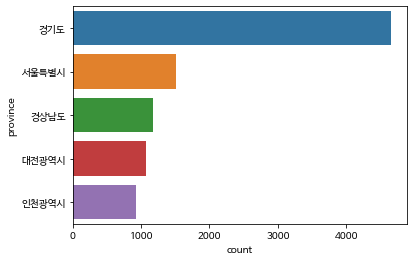

In [108]:
sns.barplot(data=result, x='count', y=result.index)
plt.show()

In [110]:
# 아파트 거래가격 평균 상위 5개 광역시도 
result = apt_subset_by_province.sort_values(by='mean', ascending=False).head()
result

,count,mean,max,min
province,,,,
서울특별시,1511,79348.775645,340000,27500
경기도,4659,39507.718395,165000,7000
세종특별자치시,156,38979.487179,74000,10000
부산광역시,886,36020.182844,85000,9800
인천광역시,922,34813.131236,85500,10100


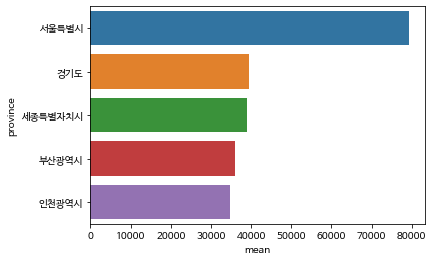

In [112]:
sns.barplot(data=result, x='mean', y=result.index)
plt.show()

* 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값

In [115]:
# seoul_apt = apt[apt['시군구'].str.startswith('서울')]
seoul_apt = apt[apt['province'] == '서울특별시']
seoul_apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year,month,county
27005,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310,서울특별시,2019,10,강남구
27006,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310,서울특별시,2019,10,강남구
27007,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310,서울특별시,2019,10,강남구
27008,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310,서울특별시,2019,10,강남구
27009,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310,서울특별시,2019,10,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88,서울특별시,2019,10,중랑구
31702,서울특별시 중랑구 중화동,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30,서울특별시,2019,10,중랑구
31703,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752,서울특별시,2019,10,중랑구
31704,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752,서울특별시,2019,10,중랑구


In [116]:
seoul_apt['시군구'].unique()

array(['서울특별시 강남구 개포동', '서울특별시 강남구 논현동', '서울특별시 강남구 대치동', '서울특별시 강남구 도곡동',
       '서울특별시 강남구 삼성동', '서울특별시 강남구 세곡동', '서울특별시 강남구 수서동', '서울특별시 강남구 신사동',
       '서울특별시 강남구 압구정동', '서울특별시 강남구 역삼동', '서울특별시 강남구 일원동',
       '서울특별시 강남구 자곡동', '서울특별시 강남구 청담동', '서울특별시 강동구 강일동', '서울특별시 강동구 고덕동',
       '서울특별시 강동구 길동', '서울특별시 강동구 둔촌동', '서울특별시 강동구 명일동', '서울특별시 강동구 상일동',
       '서울특별시 강동구 성내동', '서울특별시 강동구 암사동', '서울특별시 강동구 천호동', '서울특별시 강북구 미아동',
       '서울특별시 강북구 번동', '서울특별시 강북구 수유동', '서울특별시 강북구 우이동', '서울특별시 강서구 가양동',
       '서울특별시 강서구 공항동', '서울특별시 강서구 내발산동', '서울특별시 강서구 등촌동',
       '서울특별시 강서구 마곡동', '서울특별시 강서구 방화동', '서울특별시 강서구 염창동', '서울특별시 강서구 화곡동',
       '서울특별시 관악구 남현동', '서울특별시 관악구 봉천동', '서울특별시 관악구 신림동', '서울특별시 광진구 광장동',
       '서울특별시 광진구 구의동', '서울특별시 광진구 군자동', '서울특별시 광진구 자양동', '서울특별시 광진구 중곡동',
       '서울특별시 구로구 개봉동', '서울특별시 구로구 고척동', '서울특별시 구로구 구로동', '서울특별시 구로구 궁동',
       '서울특별시 구로구 신도림동', '서울특별시 구로구 오류동', '서울특별시 구로구 온수동',
       '서울특별시 구로구 천왕동', '서울특별시 구로구 항동', '서울특별시 금천구 가산동', '서울특별시 금천구 독산동',
  

In [118]:
seoul_apt_by_dong = seoul_apt.groupby(by='시군구')['가격'].agg(['count', 'mean', 'max', 'min'])
seoul_apt_by_dong

,count,mean,max,min
시군구,,,,
서울특별시 강남구 개포동,21,137223.809524,270000,60700
서울특별시 강남구 논현동,3,109333.333333,158000,77000
서울특별시 강남구 대치동,22,192795.454545,373000,30000
서울특별시 강남구 도곡동,23,169347.826087,461000,31800
서울특별시 강남구 삼성동,7,168714.285714,290000,103000
...,...,...,...,...
서울특별시 중랑구 면목동,38,45090.789474,74300,21000
서울특별시 중랑구 묵동,13,45619.230769,73200,11000
서울특별시 중랑구 상봉동,25,53239.200000,91000,13000


In [121]:
# 서울 아파트 거래 가격 평균 상위 10개 동 
result = seoul_apt_by_dong.sort_values(by='mean', ascending=False).head(n=10)
result

,count,mean,max,min
시군구,,,,
서울특별시 강남구 압구정동,10,263250.000000,355000,170000
서울특별시 서초구 반포동,17,224200.000000,415000,87700
서울특별시 서초구 잠원동,15,194313.333333,295000,109000
서울특별시 강남구 대치동,22,192795.454545,373000,30000
서울특별시 송파구 잠실동,22,191459.090909,308000,145000
서울특별시 종로구 홍파동,2,176500.000000,194000,159000
서울특별시 용산구 한강로3가,1,175000.000000,175000,175000
서울특별시 영등포구 여의도동,8,172562.500000,259000,105000
서울특별시 강남구 청담동,10,170200.000000,300000,75000


In [122]:
seoul_apt['county'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [125]:
seoul_apt_by_gu = seoul_apt.groupby(by='county')['가격'].agg(['count', 'mean', 'max', 'min'])
seoul_apt_by_gu 

,count,mean,max,min
county,,,,
강남구,146,156752.739726,461000,20500
강동구,254,76776.259843,175000,9000
강북구,82,50530.487805,88000,19500
강서구,276,58559.420290,133000,10200
관악구,166,53410.228916,89900,13000
광진구,132,95781.060606,185000,25500
구로구,331,52736.495468,136500,9500
금천구,149,42771.664430,93000,9000
노원구,499,42058.597194,97000,8500


In [127]:
# 거래 건수 상위 7개 구 
seoul_apt_by_gu.sort_values(by='count', ascending=False).head(n=7)

,count,mean,max,min
county,,,,
노원구,499,42058.597194,97000,8500
성북구,353,58384.390935,117000,12900
구로구,331,52736.495468,136500,9500
강서구,276,58559.420290,133000,10200
강동구,254,76776.259843,175000,9000
송파구,226,98400.663717,308000,16000
도봉구,214,37707.149533,88000,14000


In [128]:
# 거래 평균 가격 상위 7개 구
seoul_apt_by_gu.sort_values(by='mean', ascending=False).head(n=7)

,count,mean,max,min
county,,,,
강남구,146,156752.739726,461000,20500
서초구,121,150892.975207,415000,22500
용산구,75,114156.640000,485000,17000
송파구,226,98400.663717,308000,16000
광진구,132,95781.060606,185000,25500
성동구,167,93559.580838,170300,49700
마포구,145,88194.482759,198000,16500


In [129]:
# seoul_apt 데이터프레임에서 면적이 84이상 100미만인 부분 집합 
seoul_subset = seoul_apt[(seoul_apt['면적'] >= 84) & (seoul_apt['면적'] < 100)]
seoul_subset

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year,month,county
27027,서울특별시 강남구 논현동,80-13,80,13,프라임,97.8000,201910,1,93000,4,2004,도산대로30길 56,서울특별시,2019,10,강남구
27030,서울특별시 강남구 대치동,1014-3,1014,3,대치삼성,84.5800,201910,17,190000,3,2000,도곡로78길 22,서울특별시,2019,10,강남구
27033,서울특별시 강남구 대치동,988-4,988,4,대치효성,84.9100,201910,6,159000,5,1999,삼성로64길 12,서울특별시,2019,10,강남구
27037,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,84.9700,201910,14,277000,35,2015,삼성로51길 37,서울특별시,2019,10,강남구
27038,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,91.9300,201910,20,275000,23,2015,삼성로51길 35,서울특별시,2019,10,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31691,서울특별시 중랑구 신내동,801,801,0,영풍마드레빌,84.8485,201910,12,55500,6,2004,용마산로129가길 41,서울특별시,2019,10,중랑구
31692,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,41000,1,1996,봉화산로56길 123,서울특별시,2019,10,중랑구
31693,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,43000,5,1996,봉화산로56길 145-1,서울특별시,2019,10,중랑구
31694,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,11,44300,9,1996,봉화산로56길 123,서울특별시,2019,10,중랑구


In [132]:
seoul_subset_by_dong = seoul_subset.groupby(by='시군구')['가격'].agg(['count', 'mean', 'max', 'min'])
seoul_subset_by_dong

,count,mean,max,min
시군구,,,,
서울특별시 강남구 논현동,1,93000.000000,93000,93000
서울특별시 강남구 대치동,8,207000.000000,277000,137000
서울특별시 강남구 도곡동,7,142528.571429,180000,100000
서울특별시 강남구 삼성동,2,188500.000000,259000,118000
서울특별시 강남구 세곡동,3,109333.333333,119000,104000
...,...,...,...,...
서울특별시 중랑구 망우동,9,50733.333333,68000,32300
서울특별시 중랑구 면목동,15,53253.333333,74300,36500
서울특별시 중랑구 묵동,3,53333.333333,62500,48700


In [134]:
seoul_subset_by_dong.sort_values(by='mean', ascending=False).head(7)

,count,mean,max,min
시군구,,,,
서울특별시 서초구 반포동,6,244833.333333,340000,130000
서울특별시 강남구 대치동,8,207000.000000,277000,137000
서울특별시 서초구 잠원동,8,195275.000000,285000,109000
서울특별시 강남구 삼성동,2,188500.000000,259000,118000
서울특별시 용산구 서빙고동,1,183000.000000,183000,183000
서울특별시 송파구 잠실동,8,181500.000000,195000,167000
서울특별시 송파구 신천동,3,160333.333333,167000,155000


In [137]:
seoul_subset_by_gu = seoul_subset.groupby(by='county')['가격'].agg(['count', 'mean', 'max', 'min'])
seoul_subset_by_gu

,count,mean,max,min
county,,,,
강남구,35,156277.142857,277000,93000
강동구,104,86512.692308,175000,40000
강북구,25,56340.000000,87000,38000
강서구,83,75020.481928,126500,36900
관악구,51,62277.450980,80500,40750
광진구,54,99011.111111,130000,48000
구로구,106,62302.358491,124800,35300
금천구,41,55573.170732,93000,34300
노원구,72,56870.138889,90000,28000


In [138]:
seoul_subset_by_gu.sort_values(by='count', ascending=False).head(7)

,count,mean,max,min
county,,,,
성북구,118,62274.576271,95500,35200
구로구,106,62302.358491,124800,35300
강동구,104,86512.692308,175000,40000
강서구,83,75020.481928,126500,36900
동작구,77,90848.051948,130000,44000
송파구,77,100422.077922,195000,48500
은평구,72,63630.555556,90000,29500


In [139]:
seoul_subset_by_gu.sort_values(by='mean', ascending=False).head(7)

,count,mean,max,min
county,,,,
서초구,40,158377.500000,340000,61800
강남구,35,156277.142857,277000,93000
용산구,20,122880.000000,183000,66000
성동구,66,103028.030303,150000,64900
송파구,77,100422.077922,195000,48500
광진구,54,99011.111111,130000,48000
마포구,53,96716.981132,154000,55000


* TODO
    * 면적을 5 ~ 7개 구간으로 나눈 카테고리 변수를 추가
    * 건축연도를 5개 구간으로 나눈 카테고리 변수를 추가 
    * 아파트 층을 3 ~ 5개 구간으로 나눈 카테고리 변수를 추가 
    * 여러가지 시각화 
        * 가격 ~ 면적 + 건축연도 + 층수 + 지역 